In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import scipy.integrate

In [38]:
def gen_data(k=3, dim=2, points_per_cluster=200, lim=[-10, 10]):
    """
    Generates data from a random mixture of Gaussians in a given range.

    Args:
        - k: Number of Gaussian clusters
        - dim: Dimension of generated points
        - points_per_cluster: Number of points to be generated for each cluster
        - lim: Range of mean values

    Returns:
        - x: the generated points (points_per_cluster*k, dim)

    """
    x = []
    mean = np.random.rand(k, dim)*(lim[1]-lim[0]) + lim[0]
    for i in range(k):
        cov = np.random.rand(dim, dim+10)
        cov = np.matmul(cov, cov.T)
        _x = np.random.multivariate_normal(mean[i], cov, points_per_cluster)
        x += list(_x)
    x = np.array(x)
    return x 

def plot_data(x):
    dim = x.shape[1]
    fig = plt.figure()
    ax = fig.gca()

    if (dim == 1):
        #ax.hist(x, bins=50, alpha=0.7)
        ax.scatter(x, np.zeros_like(x), s=10, alpha=0.4)
        # put y lim between 0 and 1
        ax.set_ylim(-0.2, 1)
    if(dim == 2):
        ax.scatter(x[:,0], x[:,1], s=3, alpha=0.4)
        ax.autoscale(enable=True)

def integrate_gmm(gmm, x_min, x_max):
    x = np.linspace(x_min, x_max, 1000)
    y = np.zeros_like(x)
    for i in range(len(x)):
        y[i] = np.exp(gmm.score_samples([[x[i]]])[0])
    return scipy.integrate.simpson(y, x)

def predict(igmn, n_samples, x_min, x_max):
    x = np.linspace(x_min, x_max, n_samples)
    y = [np.exp(gmm.score_samples([[x_i]])[0]) for x_i in x]
    return x, y

def plot_gmm(gmm, X, x_min, x_max, x, y):
    dim = X.shape[1]
    fig = plt.figure()
    ax = fig.gca()
    plt.plot(x, y)
    
    ax.scatter(X, np.zeros_like(X), s=10, alpha=0.1)

    # limit x axis between the data points of X
    ax.set_xlim(x_min, x_max)

    plt.show()

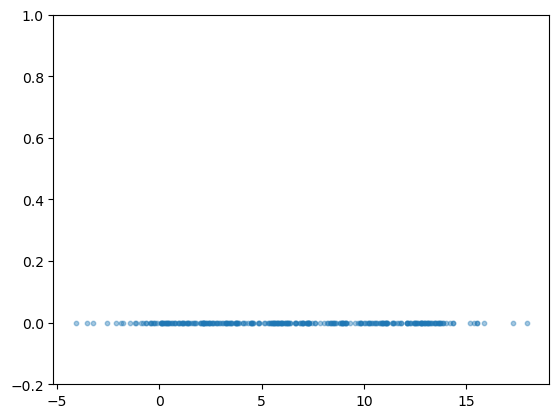

In [42]:
X = gen_data(k=3, dim=1, points_per_cluster=100, lim=[-10, 20])
x_min = X.min() - 5
x_max = X.max() + 5
plot_data(X)

In [57]:
gmm = GaussianMixture(n_components=20, covariance_type="full")

gmm.fit(X);

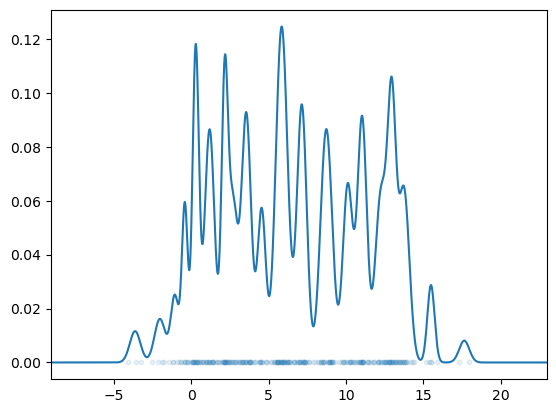

Integrates to:  1.0000000000000004


In [58]:
x, y = predict(gmm, 10000, x_min, x_max)

plot_gmm(gmm, X, x_min, x_max, x, y)
print("Integrates to: ", integrate_gmm(gmm, x_min, x_max))